In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from keras.layers import BatchNormalization
from keras.optimizers import Nadam
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('Titanic.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Я убрал из таблицы значения которые как я думаю на прямую не могут влиять на уровень выживаемости.

In [6]:
df = df.drop('Cabin', axis=1)
df = df.drop('Name', axis=1)
df = df.drop('PassengerId', axis=1)
df = df.drop('Embarked', axis=1)

df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
0,0,3,male,22.0,1,0,A/5 21171,7.2500
1,1,1,female,38.0,1,0,PC 17599,71.2833
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250
3,1,1,female,35.0,1,0,113803,53.1000
4,0,3,male,35.0,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000
887,1,1,female,19.0,0,0,112053,30.0000
888,0,3,female,NaN,1,2,W./C. 6607,23.4500
889,1,1,male,26.0,0,0,111369,30.0000


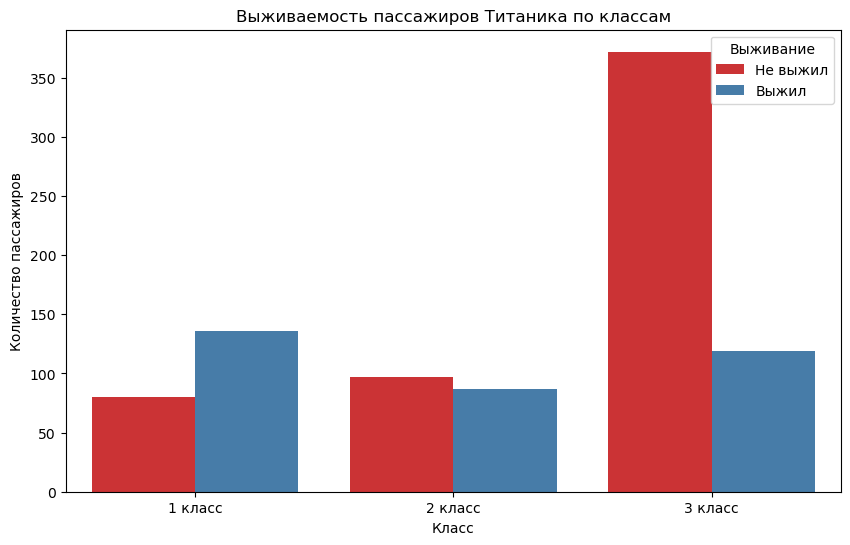

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Pclass', hue='Survived', palette='Set1')

# Заголовок и метки
plt.title('Выживаемость пассажиров Титаника по классам')
plt.xlabel('Класс')
plt.ylabel('Количество пассажиров')
plt.xticks([0, 1, 2], ['1 класс', '2 класс', '3 класс'])  # Измените метки классов по необходимости
plt.legend(title='Выживание', loc='upper right', labels=['Не выжил', 'Выжил'])

# Показать график
plt.show()

Как видно из графика класс пассажира напрямую влияет на шансы выживания. 
Пассажиры первого класса выживают чаще чем погибают.
Погибших второго класса немного больше чем выживших.
ПОгибших первого класса почти в 3 раза больше чем выживших.

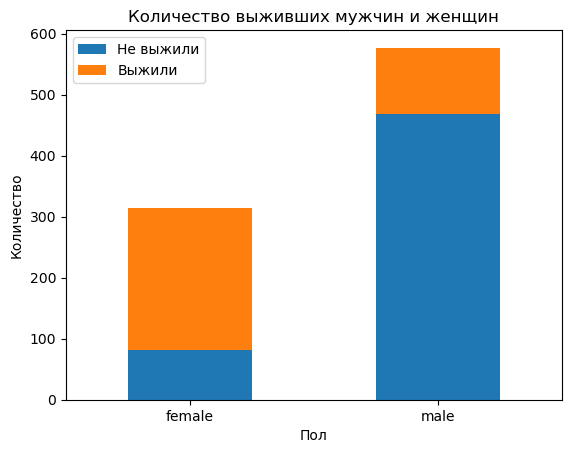

In [11]:
summary = df.groupby(['Sex', 'Survived']).size().unstack(fill_value=0)

# Создание графика
summary.plot(kind='bar', stacked=True)
plt.title('Количество выживших мужчин и женщин')
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.xticks(rotation=0)
plt.legend(['Не выжили', 'Выжили'])
plt.show()

На графике видно, что женщин выжило больше чем мужчин.
Я жумаю это связано с тем, что во время всех происшествий спасают в первую очередь женщин и детей. 

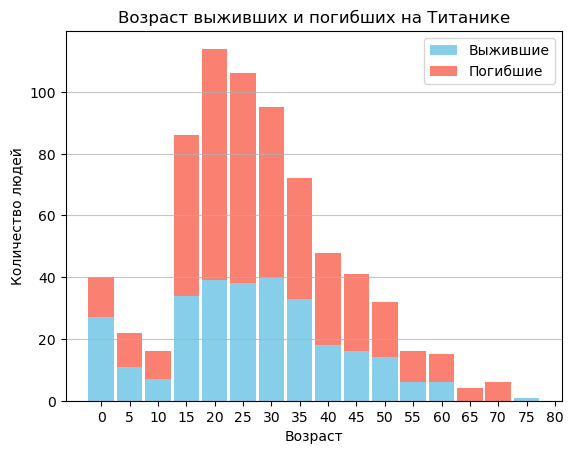

In [14]:
# Установка количества бинов
bins = range(0, 81, 5)

# Подсчет количества выживших и погибших по возрасту
survived_counts, _ = np.histogram(df[df['Survived'] == 1]['Age'], bins=bins)
deceased_counts, _ = np.histogram(df[df['Survived'] == 0]['Age'], bins=bins)

# Построение столбиков для выживших и погибших
plt.bar(bins[:-1], survived_counts, width=4.5, color='skyblue', label='Выжившие')
plt.bar(bins[:-1], deceased_counts, width=4.5, bottom=survived_counts, color='salmon', label='Погибшие')

# Настройка графика
plt.title('Возраст выживших и погибших на Титанике')
plt.xlabel('Возраст')
plt.ylabel('Количество людей')
plt.xticks(bins)  # Установка меток по оси X
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

Как видно, есть некие аномалии, так как некоторые возраста не заполнены в таблице, тк. в таблице написаны null'ы. Давайте их заполним

In [17]:
df['Age'].fillna(df['Age'].median(),inplace = True)

C:\Users\1sder\AppData\Local\Temp\ipykernel_24088\1750550615.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace = True)


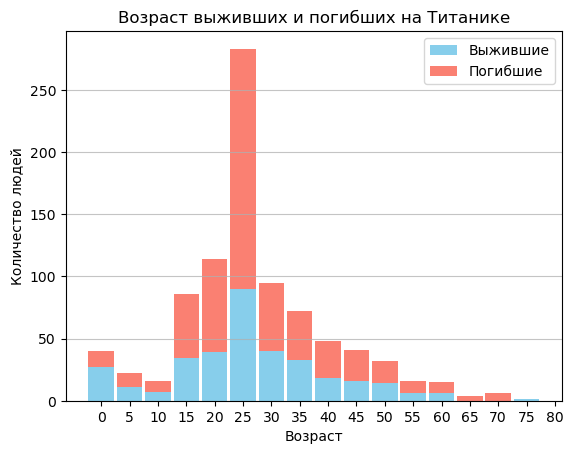

In [19]:
# Установка количества бинов
bins = range(0, 81, 5)

# Подсчет количества выживших и погибших по возрасту
survived_counts, _ = np.histogram(df[df['Survived'] == 1]['Age'], bins=bins)
deceased_counts, _ = np.histogram(df[df['Survived'] == 0]['Age'], bins=bins)

# Построение столбиков для выживших и погибших
plt.bar(bins[:-1], survived_counts, width=4.5, color='skyblue', label='Выжившие')
plt.bar(bins[:-1], deceased_counts, width=4.5, bottom=survived_counts, color='salmon', label='Погибшие')

# Настройка графика
plt.title('Возраст выживших и погибших на Титанике')
plt.xlabel('Возраст')
plt.ylabel('Количество людей')
plt.xticks(bins)  # Установка меток по оси X
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

Теперь видно, что чаще выживали именно дети и люди среднего возраста в 25 лет

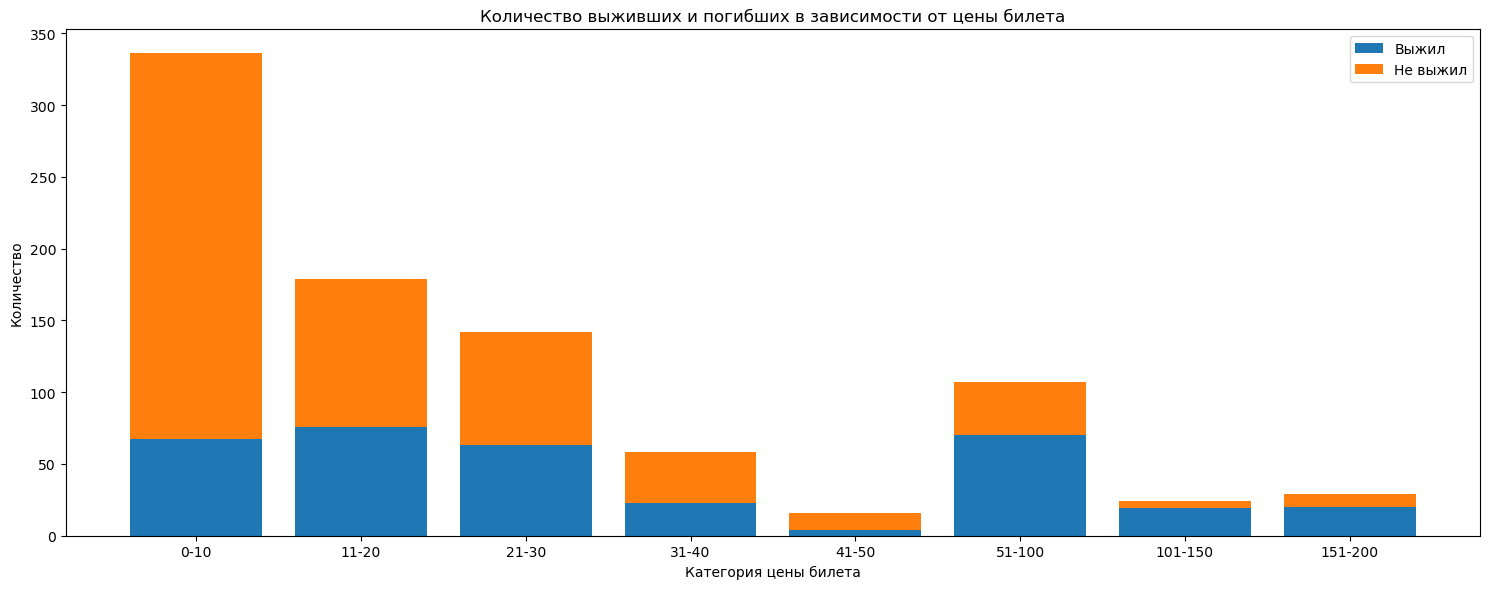

In [22]:
# Определяем функцию для более мелкой категории цены
def ticket_category(fare):
    if fare <= 10:
        return '0-10'
    elif fare <= 20:
        return '11-20'
    elif fare <= 30:
        return '21-30'
    elif fare <= 40:
        return '31-40'
    elif fare <= 50:
        return '41-50'
    elif fare <= 100:
        return '51-100'
    elif fare <= 150:
        return '101-150'
    else:
        return '151-200'

# Разделяем данные на выживших и погибших
survived = df[df['Survived'] == 1]
not_survived = df[df['Survived'] == 0]

# Создаем словарь для хранения данных
data = {}

for category in ['0-10', '11-20', '21-30', '31-40', '41-50', '51-100', '101-150', '151-200']:
    survived_count = len(survived[survived['Fare'].apply(ticket_category) == category])
    not_survived_count = len(not_survived[not_survived['Fare'].apply(ticket_category) == category])
    
    data[category] = {'Survived': survived_count, 'Not Survived': not_survived_count}

# Создаем столбчатый график
plt.figure(figsize=(15, 6))
x = list(data.keys())
y1 = [data[key]['Survived'] for key in x]
y2 = [data[key]['Not Survived'] for key in x]

plt.bar(x, y1, label='Выжил')
plt.bar(x, y2, bottom=y1, label='Не выжил')

plt.xlabel('Категория цены билета')
plt.ylabel('Количество')
plt.title('Количество выживших и погибших в зависимости от цены билета')
plt.legend()

plt.tight_layout()
plt.show()

Как видно чаще всего выживали люди у которых был билет подороже.

In [26]:
categorial_cols = df.select_dtypes(include=['object']).columns
label_encoders={}
for col in categorial_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

Изменил все буквенные выражения на цифровые

In [28]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
0,0,3,1,22.0,1,0,523,7.2500
1,1,1,0,38.0,1,0,596,71.2833
2,1,3,0,26.0,0,0,669,7.9250
3,1,1,0,35.0,1,0,49,53.1000
4,0,3,1,35.0,0,0,472,8.0500
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,101,13.0000
887,1,1,0,19.0,0,0,14,30.0000
888,0,3,0,28.0,1,2,675,23.4500
889,1,1,1,26.0,0,0,8,30.0000


In [30]:
X = df.drop(columns=['Survived'])
y = df['Survived']

Epoch 1/25


E:\1\jypiter\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.6524 - loss: 0.6796 - val_accuracy: 0.7456 - val_loss: 0.6189
Epoch 2/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7597 - loss: 0.5728 - val_accuracy: 0.8333 - val_loss: 0.4674
Epoch 3/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8239 - loss: 0.4359 - val_accuracy: 0.8772 - val_loss: 0.4006
Epoch 4/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8257 - loss: 0.4243 - val_accuracy: 0.8333 - val_loss: 0.3851
Epoch 5/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8166 - loss: 0.4124 - val_accuracy: 0.8421 - val_loss: 0.3980
Epoch 6/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8099 - loss: 0.4185 - val_accuracy: 0.8596 - val_loss: 0.3862
Epoch 7/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8230 - loss: 0.3887 - val_accuracy: 0.8684 - val_loss: 0.3868
Epoch 8/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8256 - loss: 0.3927 - val_accuracy: 0.8684 - val_loss: 0.3866
Ep

<function matplotlib.pyplot.show(close=None, block=None)>

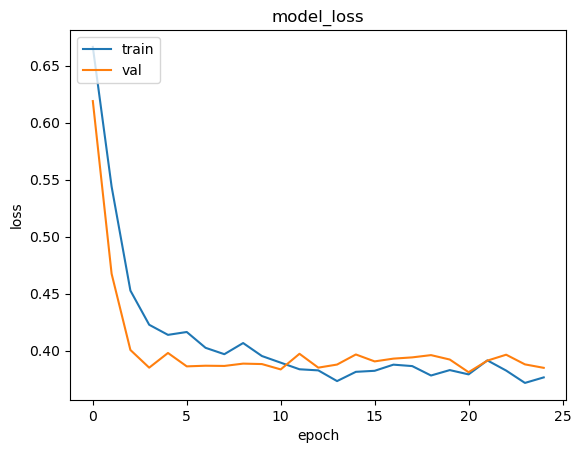

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 43)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(BatchNormalization())
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer = Nadam(), loss = 'binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs = 25, batch_size = 32, validation_split = 0.15)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show

Epoch 1/30


E:\1\jypiter\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.6262 - loss: 0.6701 - val_accuracy: 0.7368 - val_loss: 0.5618
Epoch 2/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7592 - loss: 0.5366 - val_accuracy: 0.8333 - val_loss: 0.4798
Epoch 3/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8056 - loss: 0.4794 - val_accuracy: 0.8509 - val_loss: 0.4465
Epoch 4/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8197 - loss: 0.4499 - val_accuracy: 0.8509 - val_loss: 0.4234
Epoch 5/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8384 - loss: 0.4282 - val_accuracy: 0.8509 - val_loss: 0.3917
Epoch 6/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8254 - loss: 0.4052 - val_accuracy: 0.8684 - val_loss: 0.3838
Epoch 7/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7983 - loss: 0.4446 - val_accuracy: 0.8684 - val_loss: 0.3759
Epoch 8/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7982 - loss: 0.4122 - val_accuracy: 0.8684 - val_loss: 0.3864
Ep

<function matplotlib.pyplot.show(close=None, block=None)>

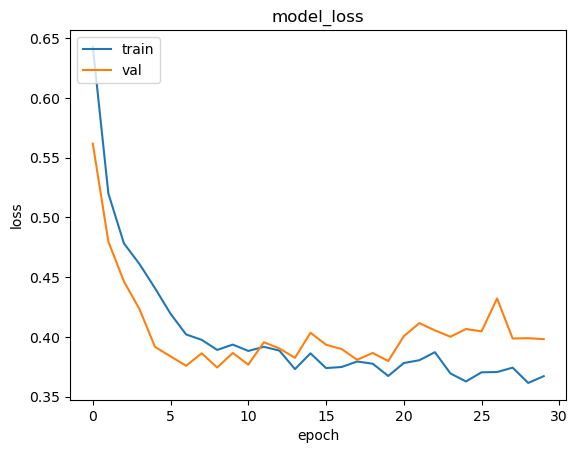

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 43)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(BatchNormalization())
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer = Nadam(learning_rate=0.001), loss = 'binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs = 30, batch_size = 32, validation_split = 0.15)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show

Epoch 1/30


E:\1\jypiter\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.5359 - loss: 0.6871 - val_accuracy: 0.6579 - val_loss: 0.6187
Epoch 2/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7342 - loss: 0.5748 - val_accuracy: 0.7807 - val_loss: 0.5146
Epoch 3/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7951 - loss: 0.5111 - val_accuracy: 0.8246 - val_loss: 0.4499
Epoch 4/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8141 - loss: 0.4683 - val_accuracy: 0.8596 - val_loss: 0.4200
Epoch 5/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8028 - loss: 0.4637 - val_accuracy: 0.8509 - val_loss: 0.4234
Epoch 6/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8396 - loss: 0.3937 - val_accuracy: 0.8596 - val_loss: 0.4212
Epoch 7/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8299 - loss: 0.4303 - val_accuracy: 0.8333 - val_loss: 0.4371
Epoch 8/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7948 - loss: 0.4355 - val_accuracy: 0.8509 - val_loss: 0.4190
Ep

<function matplotlib.pyplot.show(close=None, block=None)>

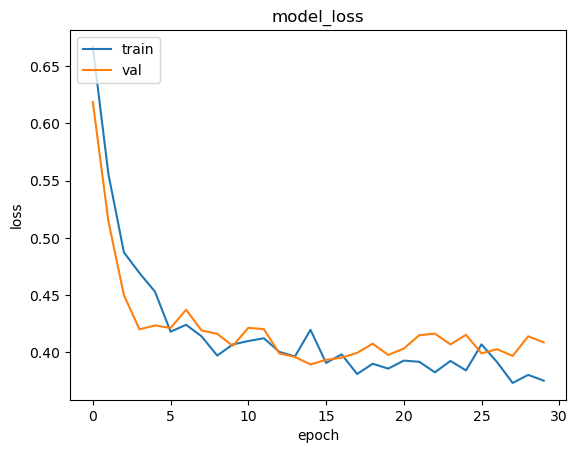

In [109]:
from tensorflow.keras.layers import Dropout

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 43)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(BatchNormalization())
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer = Nadam(learning_rate=0.001), loss = 'binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs = 30, batch_size = 32, validation_split = 0.15)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show

Epoch 1/30


E:\1\jypiter\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.6269 - loss: 0.6767 - val_accuracy: 0.6053 - val_loss: 0.6135
Epoch 2/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6271 - loss: 0.5704 - val_accuracy: 0.6053 - val_loss: 0.5151
Epoch 3/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6453 - loss: 0.5027 - val_accuracy: 0.8509 - val_loss: 0.5077
Epoch 4/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8044 - loss: 0.5040 - val_accuracy: 0.8509 - val_loss: 0.4963
Epoch 5/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8195 - loss: 0.4865 - val_accuracy: 0.8684 - val_loss: 0.4846
Epoch 6/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8129 - loss: 0.4725 - val_accuracy: 0.8509 - val_loss: 0.4621
Epoch 7/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8015 - loss: 0.4953 - val_accuracy: 0.8509 - val_loss: 0.4203
Epoch 8/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8350 - loss: 0.4193 - val_accuracy: 0.8596 - val_loss: 0.3834
Ep

<function matplotlib.pyplot.show(close=None, block=None)>

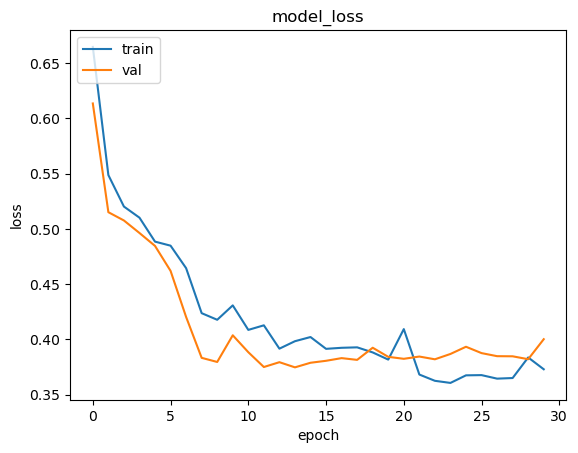

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 43)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(BatchNormalization())
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer = Nadam(learning_rate=0.001), loss = 'binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs = 30, batch_size = 32, validation_split = 0.15)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show

Epoch 1/35


E:\1\jypiter\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.6396 - loss: 0.6868 - val_accuracy: 0.6713 - val_loss: 0.6397
Epoch 2/35
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7183 - loss: 0.6075 - val_accuracy: 0.8322 - val_loss: 0.4865
Epoch 3/35
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7956 - loss: 0.4881 - val_accuracy: 0.8741 - val_loss: 0.4010
Epoch 4/35
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8360 - loss: 0.4227 - val_accuracy: 0.8741 - val_loss: 0.3717
Epoch 5/35
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8217 - loss: 0.4280 - val_accuracy: 0.8741 - val_loss: 0.3630
Epoch 6/35
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8265 - loss: 0.4051 - val_accuracy: 0.8811 - val_loss: 0.3579
Epoch 7/35
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8021 - loss: 0.4236 - val_accuracy: 0.8881 - val_loss: 0.3547
Epoch 8/35
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8103 - loss: 0.3922 - val_accuracy: 0.8881 - val_loss: 0.3565
Ep

<function matplotlib.pyplot.show(close=None, block=None)>

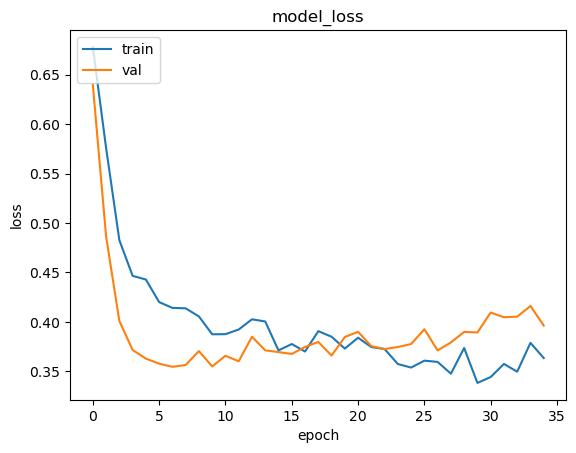

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(BatchNormalization())
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer = Nadam(learning_rate=0.001), loss = 'binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs = 35, batch_size = 32, validation_split = 0.2)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show

Epoch 1/35


E:\1\jypiter\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.6114 - loss: 0.6892 - val_accuracy: 0.5944 - val_loss: 0.6647
Epoch 2/35
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6872 - loss: 0.6436 - val_accuracy: 0.7692 - val_loss: 0.5423
Epoch 3/35
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7403 - loss: 0.5183 - val_accuracy: 0.8671 - val_loss: 0.4500
Epoch 4/35
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7843 - loss: 0.4546 - val_accuracy: 0.8881 - val_loss: 0.4126
Epoch 5/35
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7995 - loss: 0.4756 - val_accuracy: 0.8601 - val_loss: 0.3971
Epoch 6/35
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8339 - loss: 0.4198 - val_accuracy: 0.8601 - val_loss: 0.3793
Epoch 7/35
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8012 - loss: 0.4490 - val_accuracy: 0.8601 - val_loss: 0.3730
Epoch 8/35
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8219 - loss: 0.4379 - val_accuracy: 0.8531 - val_loss: 0.3762
Ep

<function matplotlib.pyplot.show(close=None, block=None)>

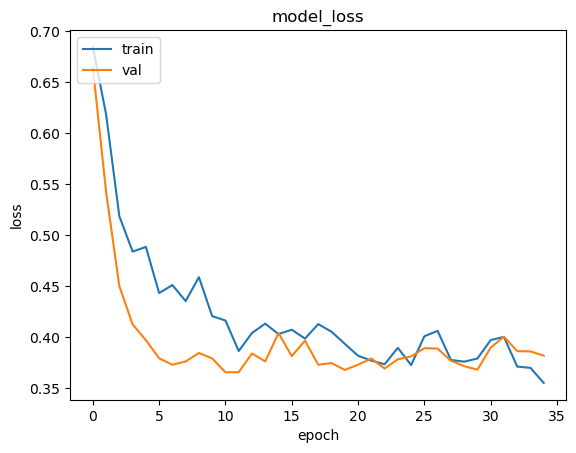

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(BatchNormalization())
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer = Nadam(learning_rate=0.001), loss = 'binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs = 35, batch_size = 32, validation_split = 0.2)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show